In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import powerlaw as pwl

In [5]:
os.chdir('../../../Downloads/New_datasets-20240309T152559Z-001/New_datasets/')

In [6]:
bbs1=[int(x) for x in open("./bbs_s1.dat", "r").read().split("\n")]
bbs2=[int(x) for x in open("./bbs_s2.dat", "r").read().split("\n")]

bbs1=np.array(bbs1) #The group of babies for silence 1  
bbs2=np.array(bbs2) #The group of babies for silence 2

In [16]:
babies = np.array(list(set(bbs1) or set(bbs2)))


In [17]:
num = babies[0]
sil = 1
fl1=pd.read_table("./trials_silence"+str(sil)+"/bb"+str(num)+"s"+str(sil)+".dat", sep="\s+", header = None)


In [19]:
fl1.shape

(90143, 8)

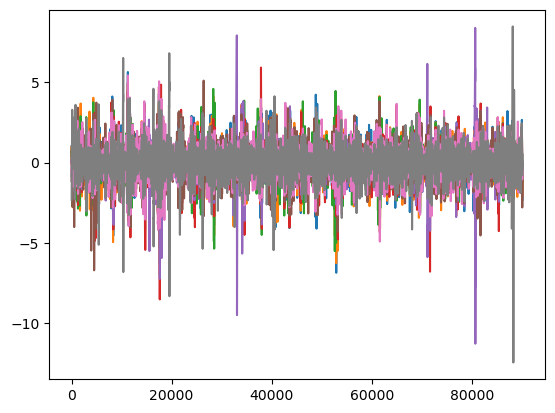

In [18]:
plt.plot(fl1)

In [18]:
#num: is the baby's number,
#sil: is the kind of silence,
#theta: is the threshold

#The trials of all babies in silence X are contained in the trial_silenceX folder where each column is a good channel series 

def avalanche(num, sil, theta):
    #We import the z-score normalized trials of a specific baby according to his number and the kind of silence (1 or 2)
    #The number of good channels change in each baby 
    fl1=pd.read_table("./trials_silence"+str(sil)+"/bb"+str(num)+"s"+str(sil)+".dat", sep="\s+", header = None)
    
    #We create a time array according to the lenght of fl1
    t=np.arange(0,len(fl1)/500,0.002)
    
    #We convert the table to an array
    fl1 = np.asarray(fl1)
    #fl1.shape
    #type(t), type(fl1)
    
    #We create a boolian array where all channels coincide simultaneously being grater than a threshold
    #len(fl1[0]) is the number of good channels 
    final_t = [np.array(np.abs(fl1[:,i]) > theta, dtype=float) for i in range(len(fl1[0]))]
    final_t = np.array(sum(final_t), dtype=bool)
    
    #We convert the boolian array to a float numeric
    final_t = np.array(final_t, dtype = float)
    
    #The key part
    av_indice_start = np.where((final_t[1:] - final_t[:-1]) >0)[0] + 1 # These are the indices where an avalanche begins
    av_indice_end = np.where((final_t[1:] - final_t[:-1])< 0)[0]    + 1# hese are the indices where an avalanche ends
    
    #We modify the content of both av_indice_start and av_indice_end depending on the 
    #initial and final values of final_t
    
    #Here both av_indice_start and av_indice_end register correctly all avalanche begginings and ends
    if final_t[0]==0 and final_t[-1]==0: 
        av_indice_start = av_indice_start
        av_indice_end = av_indice_end  # No changes on both arrays since they are correct at possitions and lenghts 
    
    #Here av_indice_end does not register the position of the end of the last avalanche  
    elif final_t[0]==0 and final_t[-1]==1:
        av_indice_end = np.append(av_indice_end,len(fl1[:,0])-1) 
    
    #Here av_indice_start does not register the position of the begining of the first avalanche
    elif final_t[0]==1 and final_t[-1]==0:
        av_indice_start = np.insert(av_indice_start,0,0)
    
    #Here av_indice_start does not register the position of the begining of the first avalanche
    # and av_indice_end does not register the position of the end of the last avalanche
    
    elif final_t[0]==1 and final_t[-1]==1:
        av_indice_start = np.insert(av_indice_start,0,0)
        av_indice_end = np.append(av_indice_end,len(fl1[:,0])-1)
                 
        
    global_signal = (sum([np.abs(fl1[:,i]) for i in range(len(fl1[0]))]))
    
    avalanche_sizes = []
    avalanche_dur = []

    for s in range(len(av_indice_start)):
        if len(av_indice_start) != len(av_indice_end):
            print('Error, they must be of the same length')
            break
        avalanche_sizes.append(np.sum(global_signal[av_indice_start[s]:av_indice_end[s]]))
        avalanche_dur.append((t[av_indice_end[s]]- t[av_indice_start[s]])/0.002)##??? giusto così ####
        
    return np.array(avalanche_sizes), np.array(avalanche_dur) 

In [19]:
#num: is the baby's number,
#sil: is the kind of silence,
#theta: is the threshold

#The trials of all babies in silence X are contained in the trial_silenceX folder where each column is a good channel series 

def intertimes(num, sil, theta):
    #We import the z-score normalized trials of a specific baby according to his number and the kind of silence (1 or 2)
    #The number of good channels change in each baby 
    fl1=pd.read_table("./trials_silence"+str(sil)+"/bb"+str(num)+"s"+str(sil)+".dat", sep="\s+", header = None)
    
    #We create a time array according to the lenght of fl1
    t=np.arange(0,len(fl1)/500,0.002)
    
    #We convert the table to an array
    fl1 = np.asarray(fl1)
    #fl1.shape
    #type(t), type(fl1)
    
    #We create a boolian array where all channels coincide simultaneously being grater than a threshold
    #len(fl1[0]) is the number of good channels 
    final_t = [np.array(np.abs(fl1[:,i]) > theta, dtype=float) for i in range(len(fl1[0]))]
    final_t = np.array(sum(final_t), dtype=bool)
    
    #We convert the boolian array to a float numeric
    final_t = np.array(final_t, dtype = float)
    
    #The key part
    av_indice_start = np.where((final_t[1:] - final_t[:-1]) <0)[0]  + 1# These are the indices where an avalanche begins
    av_indice_end = np.where((final_t[1:] - final_t[:-1])> 0)[0] + 1  # hese are the indices where an avalanche ends
    
    #We modify the content of both av_indice_start and av_indice_end depending on the 
    #initial and final values of final_t
    
    #Here both av_indice_start and av_indice_end register correctly all avalanche begginings and ends
    if final_t[0]==1 and final_t[-1]==1: 
        av_indice_start = av_indice_start
        av_indice_end = av_indice_end  # No changes on both arrays since they are correct at possitions and lenghts 
    
    #Here av_indice_end does not register the position of the end of the last avalanche  
    elif final_t[0]==1 and final_t[-1]==0:
        av_indice_end = np.append(av_indice_end,len(fl1[:,0])-1) 
    
    #Here av_indice_start does not register the position of the begining of the first avalanche
    elif final_t[0]==0 and final_t[-1]==1:
        av_indice_start = np.insert(av_indice_start,0,0)
    
    #Here av_indice_start does not register the position of the begining of the first avalanche
    # and av_indice_end does not register the position of the end of the last avalanche
    
    elif final_t[0]==0 and final_t[-1]==0:
        av_indice_start = np.insert(av_indice_start,0,0)
        av_indice_end = np.append(av_indice_end,len(fl1[:,0])-1)
               
        
    global_signal = (sum([np.abs(fl1[:,i]) for i in range(len(fl1[0]))]))
    
    #avalanche_sizes = []
    avalanche_dur = []

    for s in range(len(av_indice_start)):
        if len(av_indice_start) != len(av_indice_end):
            print('Error, they must be of the same length')
            break
        #avalanche_sizes.append(np.sum(global_signal[av_indice_start[s]:av_indice_end[s]]))
        avalanche_dur.append((t[av_indice_end[s]]- t[av_indice_start[s]])/0.002)##??? giusto così
        
    return np.array(avalanche_dur) 

In [20]:
# Here we run the function for all babies in both kind of silences
# ssil is the kind of silence
# tth is the value of the threshold 

def export_avalanche(ssil, tth):
    #We take into consideration both groups of babies at both silences 
    bbs1=[int(x) for x in open("./bbs_s1.dat", "r").read().split("\n")]
    bbs2=[int(x) for x in open("./bbs_s2.dat", "r").read().split("\n")]

    bbs1=np.array(bbs1) #The group of babies for silence 1  
    bbs2=np.array(bbs2) #The group of babies for silence 2
    
    if ssil == 1:
        group_babies = bbs1
    else:
        group_babies = bbs2
        
    print("Processing babies in silence "+str(ssil)+" with theta = "+str(tth))
    ss = []
    dd = []
    for i in group_babies:
        print("Baby %s" %i)
        #fl2=open("./ben_avalanches_silence"+str(ssil)+"/bb"+str(i)+"th"+str(tth)+".dat", "w")
        avs, tms = avalanche(i, ssil, tth)
        ss.append(avs)
        dd.append(tms)
        #for j in range(len(avs)):
        #    fl2.write("%.3f %3f\n" %(avs[j], tms[j]))
        #fl2.close()
        print("done")
    return np.array([ss,dd])

In [21]:
# Here we run the function for all babies in both kind of silences
# ssil is the kind of silence
# tth is the value of the threshold 

def export_inter_time(ssil, tth):
    #We take into consideration both groups of babies at both silences 
    bbs1=[int(x) for x in open("./bbs_s1.dat", "r").read().split("\n")]
    bbs2=[int(x) for x in open("./bbs_s2.dat", "r").read().split("\n")]

    bbs1=np.array(bbs1) #The group of babies for silence 1  
    bbs2=np.array(bbs2) #The group of babies for silence 2
    
    if ssil == 1:
        group_babies = bbs1
    else:
        group_babies = bbs2
        
    print("Processing babies in silence "+str(ssil)+" with theta = "+str(tth))
    #ss = []
    dd = []
    for i in group_babies:
        print("Baby %s" %i)
        #fl2=open("./ben_avalanches_silence"+str(ssil)+"/bb"+str(i)+"th"+str(tth)+".dat", "w")
        tms = intertimes(i, ssil, tth)
        #ss.append(avs)
        dd.append(tms)
        #for j in range(len(avs)):
        #    fl2.write("%.3f %3f\n" %(avs[j], tms[j]))
        #fl2.close()
        print("done")
    return np.array(dd)

In [22]:
def exponent(sample,maxxmin = "default",xmax = "default",lim = "default"):
    if maxxmin ==  "default":
        maxxmin = max(sample)
    if xmax ==  "default":
        xmax = max(sample)
    if lim ==  "default":
        lim = 4
        
    ypred = pwl.Fit(sample,xmin = (0.,maxxmin),xmax = xmax, parameter_range = {'alpha': [1,lim]}, discrete = False)
    return ypred.power_law.alpha, ypred.power_law.sigma

In [82]:
from statsmodels.regression import linear_model as sm
from matplotlib import cm
def sgivent(sizes, durations):
    """
    returns unique values of durations and corresponding average sizes of avalanches
    """

    tot = [durations,sizes]

    singledur = np.sort(np.unique(durations))
    sdit = [[] for i in range(len(singledur))]
    for i in range(len(singledur)):
        for z in range(len(durations)):
            if tot[0][z] == singledur[i]:
                sdit[i].append(tot[1][z])

    medie = []
    std = []
    for i in range(len(sdit)):
        medie.append(np.mean(sdit[i]))
        std.append(np.std(sdit[i])/np.sqrt(len(sdit[i])))
    return singledur,np.array(medie),np.array(std)

def delta(alpha, salpha, tau, stau):
    """
    returns delta = (alpha - 1)/(tau - 1) and corresponding error estimate
    """
    return (alpha - 1)/(tau -1), np.sqrt((1/(tau -1))**2*salpha**2+ ((1-alpha)/(tau -1)**2)**2*stau**2)


def scaling(sizes, durations,  lim1 = 4 , lim2 = 4,ax = None, tau = "default", errtau = "default", alpha = "default", erralpha = "default", maxxminsizes = 100, maxxmindur = 0.05, xmaxsizes = "default", xmaxdur = "default", xminfit = 'default',xmaxfit = 'default', plotto = False,color= 'blue'):
    
    if ax == None:
        fig = plt.figure(figsize = (6,4))
        ax = fig.add_subplot(1,1,1)
        
    if maxxminsizes ==  "default":
        maxxminsizes = max(sizes)
    if xmaxsizes ==  "default":
        xmaxsizes = max(sizes)

    
    if maxxmindur ==  "default":
        maxxmindur = max(durations)
    if xmaxdur ==  "default":
        xmaxdur = max(durations)
    
    
    if tau == "default" and errtau == "default":
        tau,errtau = exponent(sizes,maxxmin = maxxminsizes,xmax =xmaxsizes,lim = lim1,)
        
    if alpha == "default" and erralpha == "default":
        alpha,erralpha = exponent(durations,maxxmin = maxxmindur,xmax =xmaxdur,lim = lim2)

    pred =  delta(alpha, erralpha, tau, errtau )[0]
    errpred = delta(alpha, erralpha,tau, errtau)[1]


    durations = np.asarray(durations)
    if xminfit== 'default': xminfit = min(durations)
    if xmaxfit== 'default': xmaxfit = max(durations)
    
    
    prova = np.array([np.asarray(sizes), np.asarray(durations)])
    prova = prova.transpose()
    prova2 = [0 for i in range(len(prova))]
    
    for r in range(len(prova)):
        if prova[r][1] < xminfit  or prova[r][1] > xmaxfit :
            prova2[r] = False
        else:
            prova2[r] = True
            
    new = prova[prova2]
    
    a,b,c = sgivent(new[:,0],new[:,1])
    x = np.hstack((np.log10(a).reshape(-1,1), np.ones(len(a)).reshape(-1,1)))
    
    y = np.log10(b).reshape(-1,1)

    ols = sm.OLS(y,x)

    ols_result = ols.fit()
    
    fit = ols_result.params[0]
    errfit = ols_result.bse[0]
    inter =ols_result.params[1]

    grays = cm.Greys(np.linspace(0,1,15))
    reds = cm.Reds(np.linspace(0,1,15))
    greens = cm.Greens(np.linspace(0,1,15))
    blues = cm.Blues(np.linspace(0,1,30))

    nott = [0 for i in range(len(prova))]
    for r in range(len(prova)):
        if prova[r][1] < xminfit or prova[r][1] > xmaxfit :

            nott[r] = True
        else:

            nott[r] = False

    print('Prediction from crackling noise relation: delta = ',pred, '+-', errpred)
    print('Fit from of average size given duration points: delta = ',fit, '+-', errfit)

   
    x = durations
    #plotto = False
    #np.arange(xminfit,xmaxfit,0.002)
    if plotto:

        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.plot(new[:,1], new[:,0], '.', color = color,alpha = 0.3)
        ax.plot(np.asarray(durations)[nott],np.asarray(sizes)[nott], '.', color = 'gray', alpha = 0.5)
        ax.plot(x, (10**inter)*x**pred, 'r', label = 'Prediction', lw = 2)
        ax.plot(x, (10**inter)*x**fit, color = greens[12], label = 'Fit', lw = 2)
        #if errfit > errpred:
        #    ax.fill_between(x,(10**inter)*x**(fit + errfit*-3),
        #                     (10**inter)*x**(fit+ errfit*3),color= greens[3])


    #        ax.fill_between(x,(10**inter)*x**(pred+errpred*-3),
                             #(10**inter)*x**(pred+errpred*+3),color= "pink", alpha = 0.5)

       # else:
       #     ax.fill_between(x,(10**inter)*x**(pred+errpred*-3),
                             #(10**inter)*x**(pred+errpred*+3),color= "pink", alpha = 0.5)


          #  ax.fill_between(x,(10**inter)*x**(fit + errfit*-3),
                             #(10**inter)*x**(fit+ errfit*3),color= greens[3])

        x_annot_tau = 0.6
        y_annot_tau = 0.15
        ax.annotate(r'$\delta_{fit} =%2.2f \pm %2.2f $'%(round(fit,2), round(errfit,2) ),xy=(x_annot_tau,y_annot_tau),xycoords = 'axes fraction',fontsize= 17)

        x_annot_tau = 0.6
        y_annot_tau = 0.25

        ax.annotate(r'$\delta_{pred} =%2.2f \pm %2.2f$'%(round(pred,2) ,round(errpred,2) ),xy=(x_annot_tau,y_annot_tau),xycoords = 'axes fraction',fontsize= 17)
        ax.set_xlabel('Avalanche durations')
        ax.set_ylabel('Avalanche sizes')
        
        ax.legend(loc = (0.01,0.6))
        ax.errorbar(a,b,yerr = c, fmt = 'o', color = color,markersize = 3.5,barsabove = False,capsize = 3, elinewidth = 3,capthick = 1, alpha = .5)
    return np.asarray([pred, errpred,fit,errfit,a,b,c])

### Avalanche intertimes (silences)

In [24]:
res = export_inter_time(1,2)
res2 = export_inter_time(2,2)

Processing babies in silence 1 with theta = 2
Baby 5
done
Baby 6
done
Baby 9
done
Baby 10
done
Baby 11
done
Baby 12
done
Baby 16
done
Baby 17
done
Baby 18
done
Baby 19
done
Baby 21
done
Baby 30
done
Baby 33
done
Baby 35
done
Baby 37
done
Baby 38
done
Baby 40
done
Baby 45
done
Baby 47
done
Baby 49
done
Baby 52
done
Baby 56
done
Baby 58
done
Baby 60
done
Baby 62
done
Baby 66
done
Baby 67
done
Baby 68
done
Baby 71
done
Processing babies in silence 2 with theta = 2
Baby 5


C:\Users\Benedetta\AppData\Local\Temp\ipykernel_7012\630150175.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(dd)


done
Baby 6
done
Baby 9
done
Baby 11
done
Baby 12
done
Baby 16
done
Baby 17
done
Baby 18
done
Baby 19
done
Baby 25
done
Baby 30
done
Baby 33
done
Baby 34
done
Baby 35
done
Baby 37
done
Baby 39
done
Baby 40
done
Baby 45
done
Baby 47
done
Baby 49
done
Baby 52
done
Baby 53
done
Baby 56
done
Baby 57
done
Baby 58
done
Baby 63
done
Baby 66
done
Baby 67
done
Baby 68
done
Baby 69
done
Baby 71
done


C:\Users\Benedetta\AppData\Local\Temp\ipykernel_7012\630150175.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(dd)


In [25]:
(res2[0]).min()

0.999999999990564

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

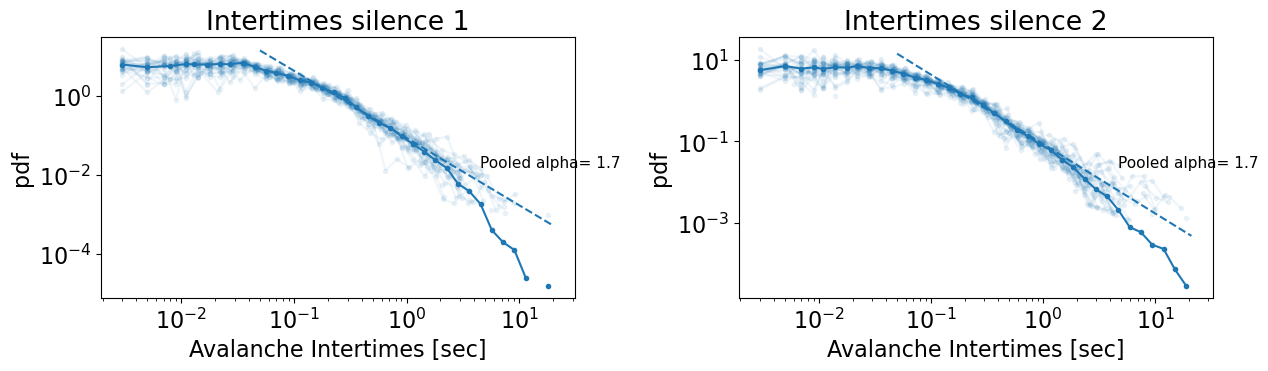

In [26]:
value = False

plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (13,4))
axd = fig.add_subplot(1,2,1)
axd2 = fig.add_subplot(1,2,2)

#axd = fig.add_subplot(,2,2)
#axsh = fig.add_subplot(2,2,3)
#axdh = fig.add_subplot(2,2,4)
#alphas = []

taus = []
#totals = []
totald  =[]

#os.chdir('../../../Downloads/avalanches_in_silences/avalanches_silence1/')
for i in range(len(res)):

    #s = ss[i]
    d = res[i] 
    data = d*0.002
    fit = pwl.Fit(data,xmin = (0.,0.05),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
    exp = fit.power_law.alpha
    try:
        pwl.plot_pdf(data,color = 'tab:blue', marker = '.', ax = axd, alpha = 0.07, linear_bins = False)
    except:
        continue
    #fit.power_law.plot_pdf(data,color = 'tab:green' ,linestyle = '--', ax = axd, alpha = 0.6)

    

  
    #totals += ss[i].tolist()
    totald += data.tolist()
    #i+=1
totald2 = []
for i in range(len(res2)):
    
    #s = ss[i]
    d = res2[i] 
    data = d*0.002
    fit = pwl.Fit(data,xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
    exp = fit.power_law.alpha
    try:
        pwl.plot_pdf(data,color = 'tab:blue', marker = '.', ax = axd2, alpha = 0.07, linear_bins = False)
        #fit.power_law.plot_pdf(data,color = 'tab:green' ,linestyle = '--', ax = axd, alpha = 0.6)
    except:
        continue

    
    
    #totals += ss[i].tolist()
    totald2 += data.tolist()
    #i+=1

axd.set_xlabel(r'Avalanche Intertimes [sec]')
axd.set_ylabel(r'pdf')

axd2.set_xlabel(r'Avalanche Intertimes [sec]')
axd2.set_ylabel(r'pdf')
axd.set_title('Intertimes silence 1')

axd2.set_title('Intertimes silence 2')

#totals = np.asarray(totals)
totald = np.asarray(totald)
#total2d = np.asarray(totald2)


data = totald
fit = pwl.Fit(data,xmin = (0.,0.05), xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
exp = fit.power_law.alpha
axd.annotate("Pooled alpha= {}".format(round(exp,2)),[0.8,0.5], xycoords = 'axes fraction', fontsize = 11)
pwl.plot_pdf(data,color = 'tab:blue', marker = '.', ax = axd)
fit.power_law.plot_pdf(data,color = 'tab:blue' ,linestyle = '--', ax = axd)





#totals = np.asarray(totals)
totald2 = np.asarray(totald2)

data = totald2
fit = pwl.Fit(data,xmin = (0.,0.05), xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
exp = fit.power_law.alpha
axd2.annotate("Pooled alpha= {}".format(round(exp,2)),[0.8,0.5], xycoords = 'axes fraction', fontsize = 11)
pwl.plot_pdf(data,color = 'tab:blue', marker = '.', ax = axd2)
fit.power_law.plot_pdf(data,color = 'tab:blue' ,linestyle = '--', ax = axd2)
## check duratio
        
plt.tight_layout()


## farlo per silenzion 1 e silenzio 2

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

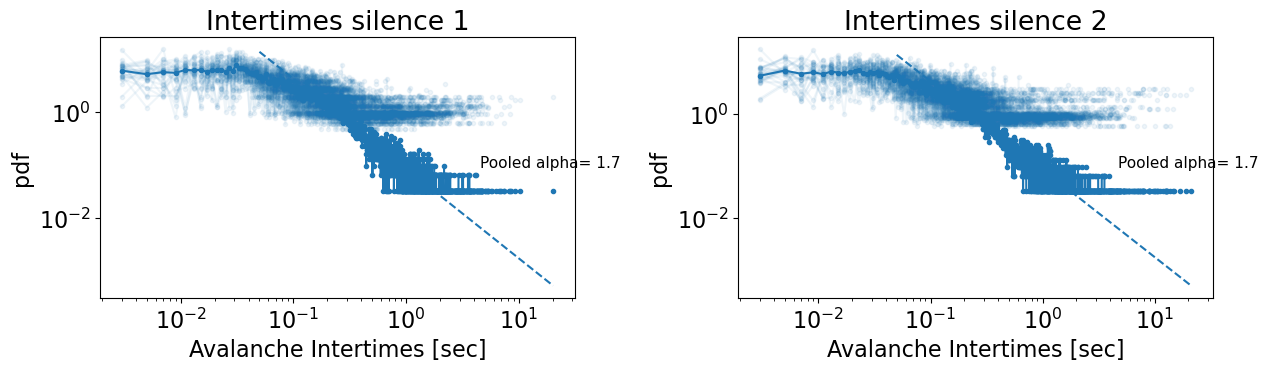

In [27]:
value = False

plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (13,4))
axd = fig.add_subplot(1,2,1)
axd2 = fig.add_subplot(1,2,2)

#axd = fig.add_subplot(,2,2)
#axsh = fig.add_subplot(2,2,3)
#axdh = fig.add_subplot(2,2,4)
#alphas = []

taus = []
#totals = []
totald  =[]

#os.chdir('../../../Downloads/avalanches_in_silences/avalanches_silence1/')
for i in range(len(res)):

    #s = ss[i]
    d = res[i] 
    data = d*0.002
    fit = pwl.Fit(data,xmin = (0.,0.05),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
    exp = fit.power_law.alpha
    pwl.plot_pdf(data,color = 'tab:blue', marker = '.', ax = axd, alpha = 0.07, linear_bins = True)

  
    #totals += ss[i].tolist()
    totald += data.tolist()
    #i+=1
totald2 = []
for i in range(len(res2)):
    
    #s = ss[i]
    d = res2[i] 
    data = d*0.002
    fit = pwl.Fit(data,xmin = (0.,0.05),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
    exp = fit.power_law.alpha
    pwl.plot_pdf(data,color = 'tab:blue', marker = '.', ax = axd2, alpha = 0.07, linear_bins = True)

    
    
    #totals += ss[i].tolist()
    totald2 += data.tolist()
    #i+=1

axd.set_xlabel(r'Avalanche Intertimes [sec]')
axd.set_ylabel(r'pdf')

axd2.set_xlabel(r'Avalanche Intertimes [sec]')
axd2.set_ylabel(r'pdf')
axd.set_title('Intertimes silence 1')

axd2.set_title('Intertimes silence 2')


#totals = np.asarray(totals)
totald = np.asarray(totald)
#total2d = np.asarray(totald2)


data = totald
fit = pwl.Fit(data,xmin = (0.,0.05), xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
exp = fit.power_law.alpha
axd.annotate("Pooled alpha= {}".format(round(exp,2)),[0.8,0.5], xycoords = 'axes fraction', fontsize = 11)
pwl.plot_pdf(data,color = 'tab:blue', marker = '.', ax = axd,linear_bins = True)
fit.power_law.plot_pdf(data,color = 'tab:blue' ,linestyle = '--', ax = axd)

#axd.set_xscale('linear')



#totals = np.asarray(totals)
totald2 = np.asarray(totald2)

data = totald2
fit = pwl.Fit(data,xmin = (0.,0.05), xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
exp = fit.power_law.alpha
axd2.annotate("Pooled alpha= {}".format(round(exp,2)),[0.8,0.5], xycoords = 'axes fraction', fontsize = 11)
pwl.plot_pdf(data,color = 'tab:blue', marker = '.', ax = axd2,linear_bins = True)
fit.power_law.plot_pdf(data,color = 'tab:blue' ,linestyle = '--', ax = axd2)
## check duratio
        
plt.tight_layout()
#axd2.set_xscale('linear')


## farlo per silenzion 1 e silenzio 2

In [28]:
res = export_avalanche(1,2)
res2 = export_avalanche(2,2)

Processing babies in silence 1 with theta = 2
Baby 5
done
Baby 6
done
Baby 9
done
Baby 10
done
Baby 11
done
Baby 12
done
Baby 16
done
Baby 17
done
Baby 18
done
Baby 19
done
Baby 21
done
Baby 30
done
Baby 33
done
Baby 35
done
Baby 37
done
Baby 38
done
Baby 40
done
Baby 45
done
Baby 47
done
Baby 49
done
Baby 52
done
Baby 56
done
Baby 58
done
Baby 60
done
Baby 62
done
Baby 66
done
Baby 67
done
Baby 68
done
Baby 71
done
Processing babies in silence 2 with theta = 2
Baby 5


C:\Users\Benedetta\AppData\Local\Temp\ipykernel_7012\2474095475.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([ss,dd])


done
Baby 6
done
Baby 9
done
Baby 11
done
Baby 12
done
Baby 16
done
Baby 17
done
Baby 18
done
Baby 19
done
Baby 25
done
Baby 30
done
Baby 33
done
Baby 34
done
Baby 35
done
Baby 37
done
Baby 39
done
Baby 40
done
Baby 45
done
Baby 47
done
Baby 49
done
Baby 52
done
Baby 53
done
Baby 56
done
Baby 57
done
Baby 58
done
Baby 63
done
Baby 66
done
Baby 67
done
Baby 68
done
Baby 69
done
Baby 71
done


C:\Users\Benedetta\AppData\Local\Temp\ipykernel_7012\2474095475.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([ss,dd])


### Avalanche sizes and durations + $<s(t)>$ vs T

In [29]:
ss = res[0]
dd = res[1]

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

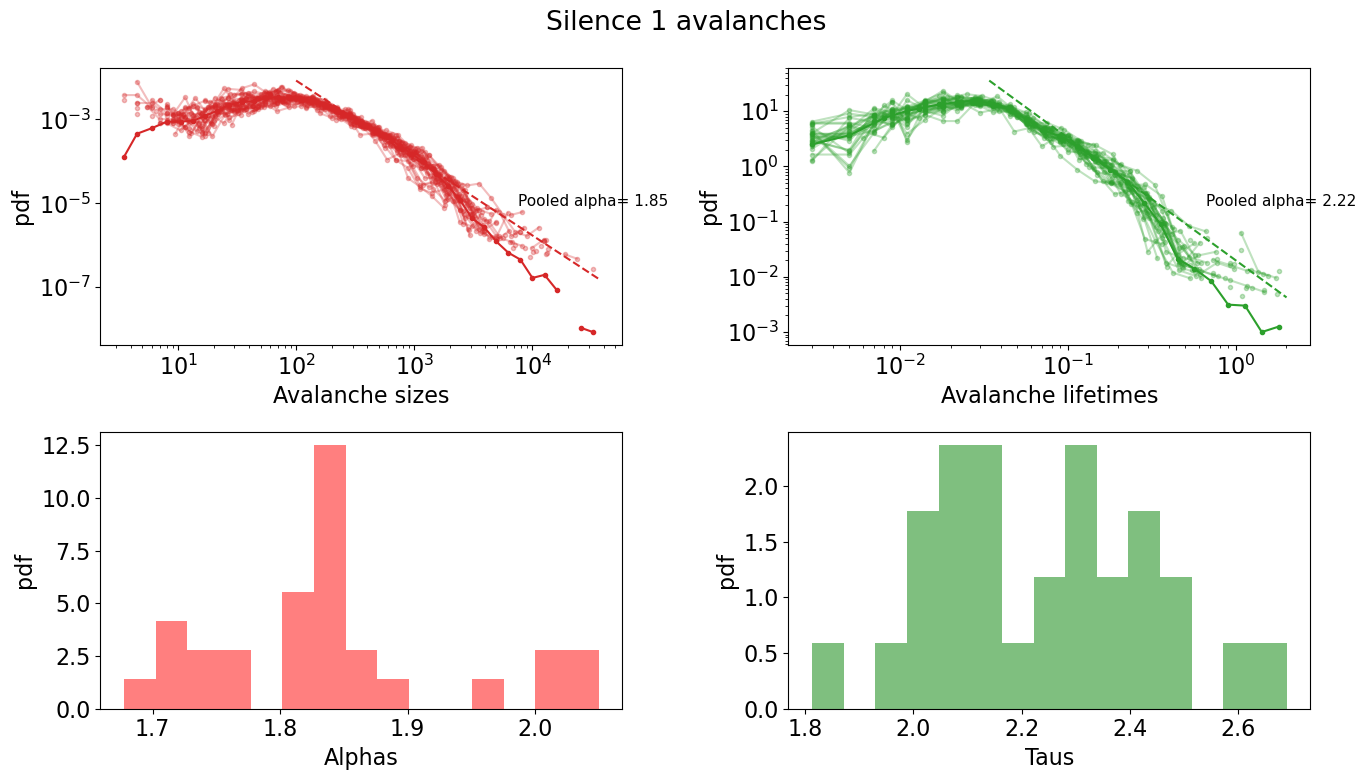

In [30]:
value = False

plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (14,8))
fig.suptitle('Silence 1 avalanches')
axs = fig.add_subplot(2,2,1)
axd = fig.add_subplot(2,2,2)
axsh = fig.add_subplot(2,2,3)
axdh = fig.add_subplot(2,2,4)
alphas = []

taus = []
totals = []
totald  =[]

#os.chdir('../../../Downloads/avalanches_in_silences/avalanches_silence1/')
for i in range(len(ss)):

    s = ss[i]
    d = dd[i]*0.002
    data = s
    fit = pwl.Fit(data,xmin =(1,100),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = value)
    exp = fit.power_law.alpha
    pwl.plot_pdf(data,color = 'tab:red', marker = '.', ax = axs, alpha = 0.3)
    #fit.power_law.plot_pdf(data,color = 'tab:red' ,linestyle = '--', ax = axs)

    #axs.annotate("alpha= {}".format(round(exp,2)),[0.8,0.5])
    alphas.append(exp)
    data = d
    fit = pwl.Fit(data,xmin =(0,0.05),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
    exp = fit.power_law.alpha
    pwl.plot_pdf(data,color = 'tab:green', marker = '.', ax = axd, alpha = 0.3)
    taus.append(exp)
    #if i == 1: break



    totals += ss[i].tolist()
    totald += d.tolist()
    #i+=1

axs.set_xlabel(r'Avalanche sizes')
axs.set_ylabel(r'pdf')
#fit.power_law.plot_pdf(data,color = 'tab:green' ,linestyle = '--', ax = axd, alpha = 0.6)
axd.set_xlabel(r'Avalanche lifetimes')
axd.set_ylabel(r'pdf')
#axd.annotate("alpha= {}

totals = np.asarray(totals)
totald = np.asarray(totald)

data = totals
fit = pwl.Fit(data,xmin =(1,100),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = value)
exp = fit.power_law.alpha
axs.annotate("Pooled alpha= {}".format(round(exp,2)),[0.8,0.5], xycoords = 'axes fraction',fontsize = 11)

pwl.plot_pdf(data,color = 'tab:red', marker = '.', ax = axs)
fit.power_law.plot_pdf(data,color = 'tab:red' ,linestyle = '--',ax = axs)


data = totald
fit = pwl.Fit(data,xmin =(0,0.05),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False,)
exp = fit.power_law.alpha
axd.annotate("Pooled alpha= {}".format(round(exp,2)),[0.8,0.5], xycoords = 'axes fraction', fontsize = 11)
pwl.plot_pdf(data,color = 'tab:green', marker = '.', ax = axd)
fit.power_law.plot_pdf(data,color = 'tab:green' ,linestyle = '--', ax = axd)



axsh.hist(alphas, bins = 15, color = 'red', alpha = .5, density = True)
axsh.set_xlabel('Alphas')
axsh.set_ylabel('pdf')

axdh.hist(taus, bins = 15, color = 'green', alpha = .5, density = True)
axdh.set_xlabel('Taus')
axdh.set_ylabel('pdf')
        
plt.tight_layout()

In [31]:
totals = np.asarray(totals)


In [33]:
os.chdir('../../../Desktop/Criticality in barrel cortex')
from power import *
from powerlaw_fit import *
from stats import *

In [35]:
ss = res[0]
dd = res[1]

totals = []
#totald  =[]

#os.chdir('../../../Downloads/avalanches_in_silences/avalanches_silence1/')
for i in range(len(ss)):

    s = ss[i]
    totals += ss[i].tolist()

In [36]:
cc = []
for i in range(len(ss)):

    s = ss[i]
    #totals += ss[i].tolist()
    v = x_autocorr_sm(s)  
    cc.append(v['C'])

In [37]:
cc = np.asarray(cc)
lens =[]
for i in range(len(cc)):
    lens.append(len(cc[i]))
#cc[0].shape, cc[1].shape, cc[2].shape

C:\Users\Benedetta\AppData\Local\Temp\ipykernel_7012\2667696206.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cc = np.asarray(cc)


In [67]:
#lens
minn = min(lens)

In [39]:
minn

127

In [65]:
cc = np.asarray(cc)
meancc =[]
for i in range(len(cc)):
    meancc.append(cc[i][:minn])

In [66]:
meancc  = np.asarray(meancc)
meancc = np.mean(meancc,0)


In [64]:
t

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [63]:
t[:minn].shape, meancc.shape

((84,), (84,))

C:\Users\Benedetta\AppData\Local\Temp\ipykernel_7012\214394212.py:13: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,100)


(0.7428426521121263, 100)

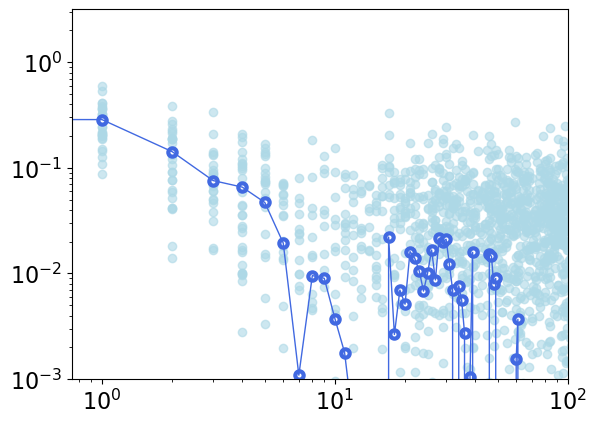

In [62]:
for r in range(29):
    t = np.arange(0,len(cc[r]),1)
    plt.scatter(t,cc[r], marker = 'o',color = 'lightblue', alpha = 0.6)
    
#plt.yscale('log')
#plt.xscale('log')    
plt.ylim(10**-3,10**0.5)
plt.plot(t[:minn],meancc, '-',lw = 1, color = 'royalblue')
plt.scatter(t[:minn],meancc, marker ='o',lw = 3, c = 'white', edgecolor = 'royalblue')

plt.yscale('log')
plt.xscale('log')
plt.xlim(0,100)

In [43]:
ss = res2[0]
dd = res2[1]

C:\Users\Benedetta\AppData\Local\Temp\ipykernel_7012\3259282332.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cc = np.asarray(cc)
C:\Users\Benedetta\AppData\Local\Temp\ipykernel_7012\3259282332.py:46: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,100)


(0.7428426521121263, 100)

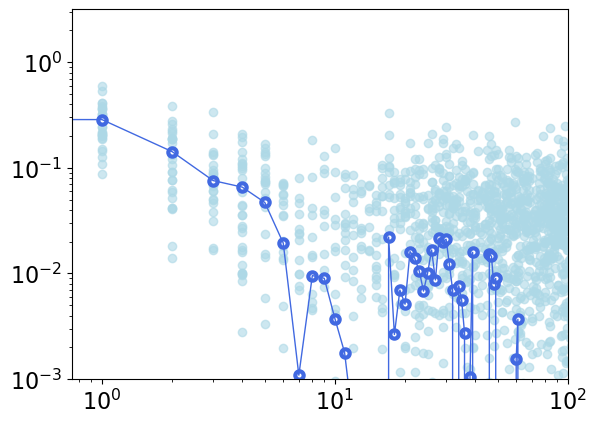

In [68]:
cc = []
for i in range(len(ss)):

    s = ss[i]
    #totals += ss[i].tolist()
    v = x_autocorr_sm(s)  
    cc.append(v['C'])

cc = np.asarray(cc)
lens =[]
for i in range(len(cc)):
    lens.append(len(cc[i]))
#cc[0].shape, cc[1].shape, cc[2].shape

#lens
minn = min(lens)

minn

cc = np.asarray(cc)
meancc =[]
for i in range(len(cc)):
    meancc.append(cc[i][:minn])

meancc  = np.asarray(meancc)
meancc = np.mean(meancc,0)


t

t[:minn].shape, meancc.shape

for r in range(29):
    t = np.arange(0,len(cc[r]),1)
    plt.scatter(t,cc[r], marker = 'o',color = 'lightblue', alpha = 0.6)
    
#plt.yscale('log')
#plt.xscale('log')    
plt.ylim(10**-3,10**0.5)
plt.plot(t[:minn],meancc, '-',lw = 1, color = 'royalblue')
plt.scatter(t[:minn],meancc, marker ='o',lw = 3, c = 'white', edgecolor = 'royalblue')


plt.yscale('log')
plt.xscale('log')
plt.xlim(0,100)



Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

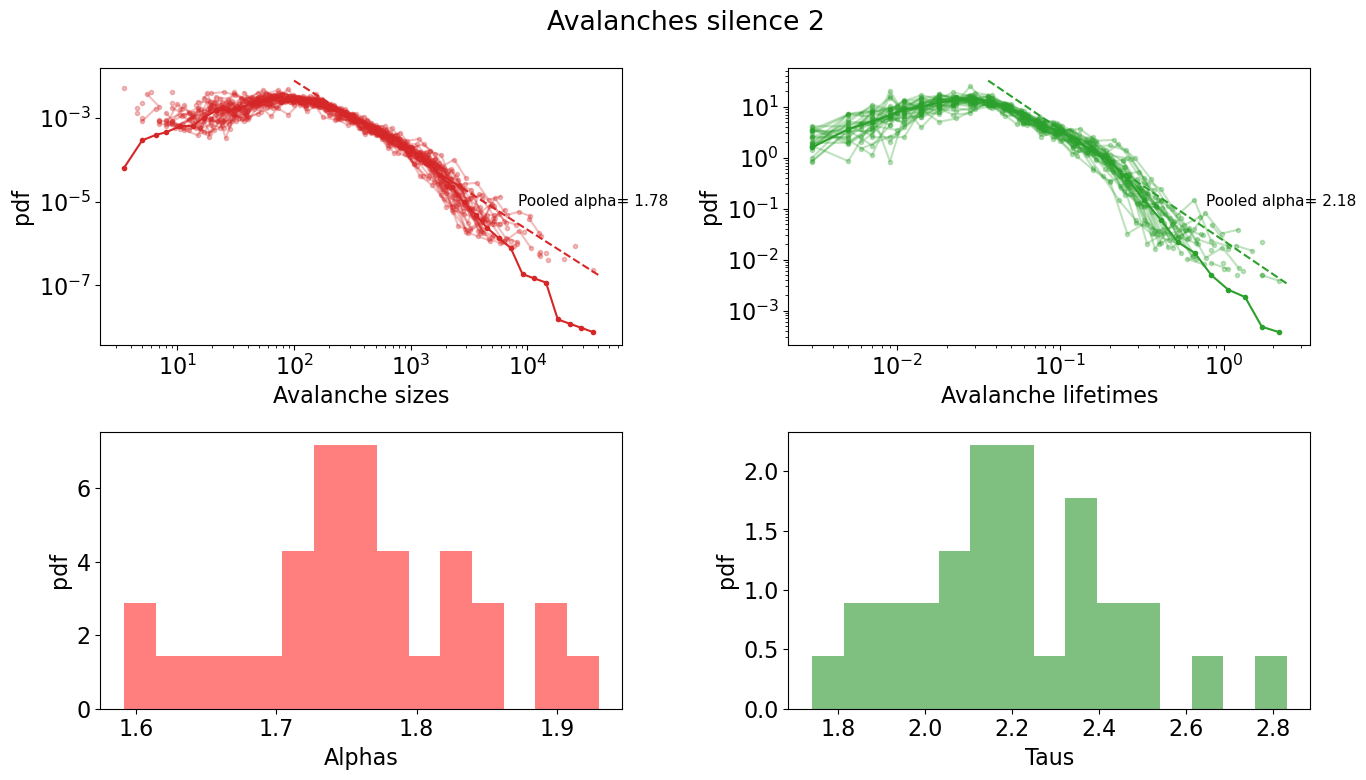

In [45]:
value = False

plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (14,8))
fig.suptitle('Avalanches silence 2')
axs = fig.add_subplot(2,2,1)
axd = fig.add_subplot(2,2,2)
axsh = fig.add_subplot(2,2,3)
axdh = fig.add_subplot(2,2,4)
alphas = []

taus = []
totals = []
totald  =[]

#os.chdir('../../../Downloads/avalanches_in_silences/avalanches_silence1/')
for i in range(len(ss)):

    s = ss[i]
    d = dd[i]*0.002
    data = s
    fit = pwl.Fit(data,xmin =(1,100),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = value)
    exp = fit.power_law.alpha
    pwl.plot_pdf(data,color = 'tab:red', marker = '.', ax = axs, alpha = 0.3)
    alphas.append(exp)
    
    
    data = d
    fit = pwl.Fit(data,xmin =(0,0.05),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
    exp = fit.power_law.alpha
    pwl.plot_pdf(data,color = 'tab:green', marker = '.', ax = axd, alpha = 0.3)
    taus.append(exp)
    #if i == 1: break



    totals += ss[i].tolist()
    totald += d.tolist()
    #i+=1


axs.set_xlabel(r'Avalanche sizes')
axs.set_ylabel(r'pdf')
axd.set_xlabel(r'Avalanche lifetimes')
axd.set_ylabel(r'pdf')
totals = np.asarray(totals)
totald = np.asarray(totald)

data = totals
fit = pwl.Fit(data,xmin =(1,100),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = value)
exp = fit.power_law.alpha
axs.annotate("Pooled alpha= {}".format(round(exp,2)),[0.8,0.5], xycoords = 'axes fraction',fontsize = 11)

pwl.plot_pdf(data,color = 'tab:red', marker = '.', ax = axs)
fit.power_law.plot_pdf(data,color = 'tab:red' ,linestyle = '--',ax = axs)


data = totald
fit = pwl.Fit(data,xmin =(0,0.05),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False,)
exp = fit.power_law.alpha
axd.annotate("Pooled alpha= {}".format(round(exp,2)),[0.8,0.5], xycoords = 'axes fraction', fontsize = 11)
pwl.plot_pdf(data,color = 'tab:green', marker = '.', ax = axd)
fit.power_law.plot_pdf(data,color = 'tab:green' ,linestyle = '--', ax = axd)



axsh.hist(alphas, bins = 15, color = 'red', alpha = .5, density = True)
axsh.set_xlabel('Alphas')
axsh.set_ylabel('pdf')

axdh.hist(taus, bins = 15, color = 'green', alpha = .5, density = True)
axdh.set_xlabel('Taus')
axdh.set_ylabel('pdf')
        
plt.tight_layout()

In [53]:
25*0.002

0.05

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


<Axes: xlabel='Avalanche lifetimes', ylabel='pdf'>

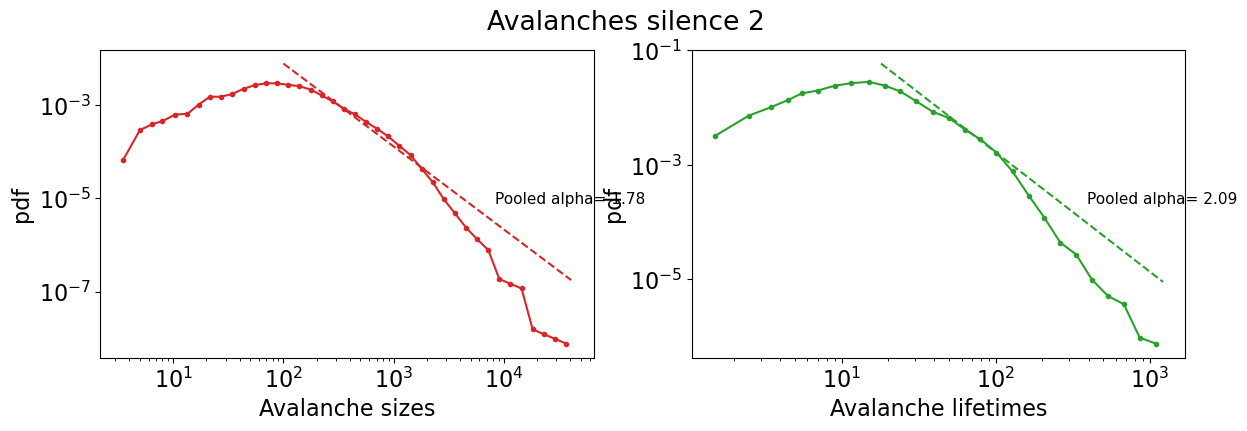

In [54]:
value = False

plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (14,4))
fig.suptitle('Avalanches silence 2')
axs = fig.add_subplot(1,2,1)
axd = fig.add_subplot(1,2,2)
#axsh = fig.add_subplot(2,2,3)
#axdh = fig.add_subplot(2,2,4)
axs.set_xlabel(r'Avalanche sizes')
axs.set_ylabel(r'pdf')
axd.set_xlabel(r'Avalanche lifetimes')
axd.set_ylabel(r'pdf')
totals = np.asarray(totals)
totald = np.asarray(totald)

data = totals
fit = pwl.Fit(data,xmin =(1,100),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = value)
exp = fit.power_law.alpha
axs.annotate("Pooled alpha= {}".format(round(exp,2)),[0.8,0.5], xycoords = 'axes fraction',fontsize = 11)

pwl.plot_pdf(data,color = 'tab:red', marker = '.', ax = axs)
fit.power_law.plot_pdf(data,color = 'tab:red' ,linestyle = '--',ax = axs)


data = totald/0.002
fit = pwl.Fit(data,xmin =(0,25),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = True,)
exp = fit.power_law.alpha
axd.annotate("Pooled alpha= {}".format(round(exp,2)),[0.8,0.5], xycoords = 'axes fraction', fontsize = 11)
pwl.plot_pdf(data,color = 'tab:green', marker = '.', ax = axd)
fit.power_law.plot_pdf(data,color = 'tab:green' ,linestyle = '--', ax = axd)




### $<S(t)>$ vs T

In [55]:
ss = res[0]
dd = res[1]

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.3795567240905258 +- 0.09815181515308721
Fit from of average size given duration points: delta =  1.149372707178839 +- 0.014144530558655692
Calculating best minimal value for power law fit


C:\Users\Benedetta\AppData\Local\Temp\ipykernel_7012\521089483.py:147: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray([pred, errpred,fit,errfit,a,b,c])


Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.4377584303359778 +- 0.10241537199752496
Fit from of average size given duration points: delta =  1.1322131210068695 +- 0.013527950270392991
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.4676501214977198 +- 0.07946205800040196
Fit from of average size given duration points: delta =  1.0992448792031386 +- 0.011077328558295275
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.3125918429273051 +- 0.09253227039016386
Fit from of average size given duration points: delta =  1.1411535235360177 +- 0.016584785167484645
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.5839121233944247 +- 0.118

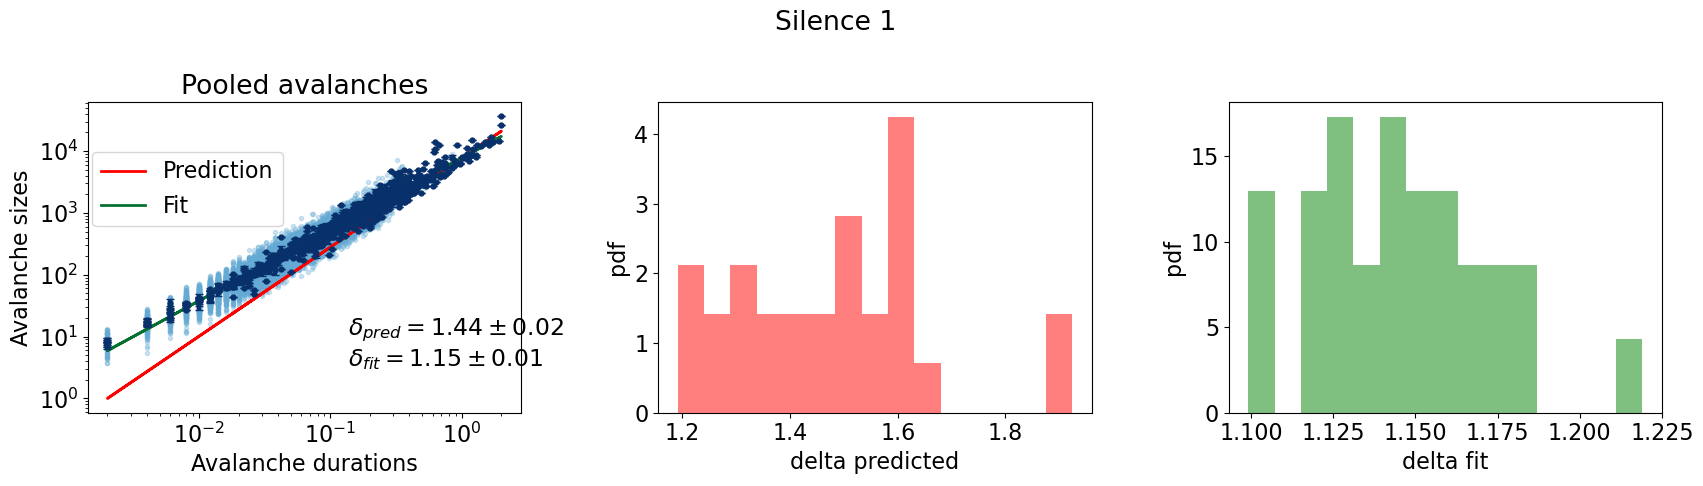

In [56]:
value = False

plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (17,5))
fig.suptitle('Silence 1')
axsd = fig.add_subplot(1,3,1)
axh1 = fig.add_subplot(1,3,2)
axh2 = fig.add_subplot(1,3,3)
#axdh = fig.add_subplot(2,2,4)
alphas = []

pred = []
fit =[]
totals = []
totald  =[]

#os.chdir('../../../Downloads/avalanches_in_silences/avalanches_silence1/')
for i in range(len(ss)):

    s = ss[i]
    d = dd[i]*0.002
    
    v = scaling(s,d, ax = axsd)
    #axd.annotate("alpha= {}".format(round(exp,2)),[0.8,0.5])
    pred.append(v[0])
    fit.append(v[2])
    #if i == 1: break
    


    totals += ss[i].tolist()
    totald += d.tolist()
    #i+=1



totals = np.asarray(totals)
totald = np.asarray(totald)
v = scaling(totals,totald, ax = axsd,plotto = True)
#axsd.set_ylim(10**2.5,10**5)
axsd.set_title('Pooled avalanches')
axh1.hist(pred, bins = 15, color = 'red', alpha = .5, density = True)
axh1.set_xlabel('delta predicted')
axh1.set_ylabel('pdf')

axh2.hist(fit, bins = 15, color = 'green', alpha = .5, density = True)
axh2.set_xlabel('delta fit')
axh2.set_ylabel('pdf')

        
plt.tight_layout()

In [57]:
g

NameError: name 'g' is not defined

In [ ]:
g = np.array([v[4:][0],v[4:][1],v[4:][2]])
g.shape

In [ ]:
v[4:].shape

In [ ]:
pwd

In [ ]:
import pandas as pd
gg = pd.DataFrame(g.T, columns = ['Durations [s]', 'Average sizes', 'Std sizes'], index = None)
gg.to_csv('C:/Users/Benedetta/Desktop/Criticality in barrel cortex/numpy files/Sizes vs Durations silence 1.csv')

In [ ]:
k = pd.read_csv('C:/Users/Benedetta/Desktop/Criticality in barrel cortex/numpy files/Sizes vs Durations silence 1.csv', index_col = 0)

In [ ]:
k

In [58]:
ss = res2[0]
dd = res2[1]

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.3171396743989157 +- 0.12648303517309328
Fit from of average size given duration points: delta =  1.1752569712774754 +- 0.014564430848005029
Calculating best minimal value for power law fit


C:\Users\Benedetta\AppData\Local\Temp\ipykernel_7012\521089483.py:147: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray([pred, errpred,fit,errfit,a,b,c])


Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.9200170852776082 +- 0.13321154628621493
Fit from of average size given duration points: delta =  1.132298466047973 +- 0.013164934486988982
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.4353765155497362 +- 0.09104449907521095
Fit from of average size given duration points: delta =  1.1541272849996895 +- 0.012645251064541983
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.5299493411950407 +- 0.10565274554215404
Fit from of average size given duration points: delta =  1.1714861142992024 +- 0.014863743932127119
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.201358725636915 +- 0.12474

Prediction from crackling noise relation: delta =  1.5447735093138801 +- 0.20171156785945418
Fit from of average size given duration points: delta =  1.2918559687944788 +- 0.0293867784726361
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.508474883610495 +- 0.020432911252204287
Fit from of average size given duration points: delta =  1.1638264078039522 +- 0.005144980179134906


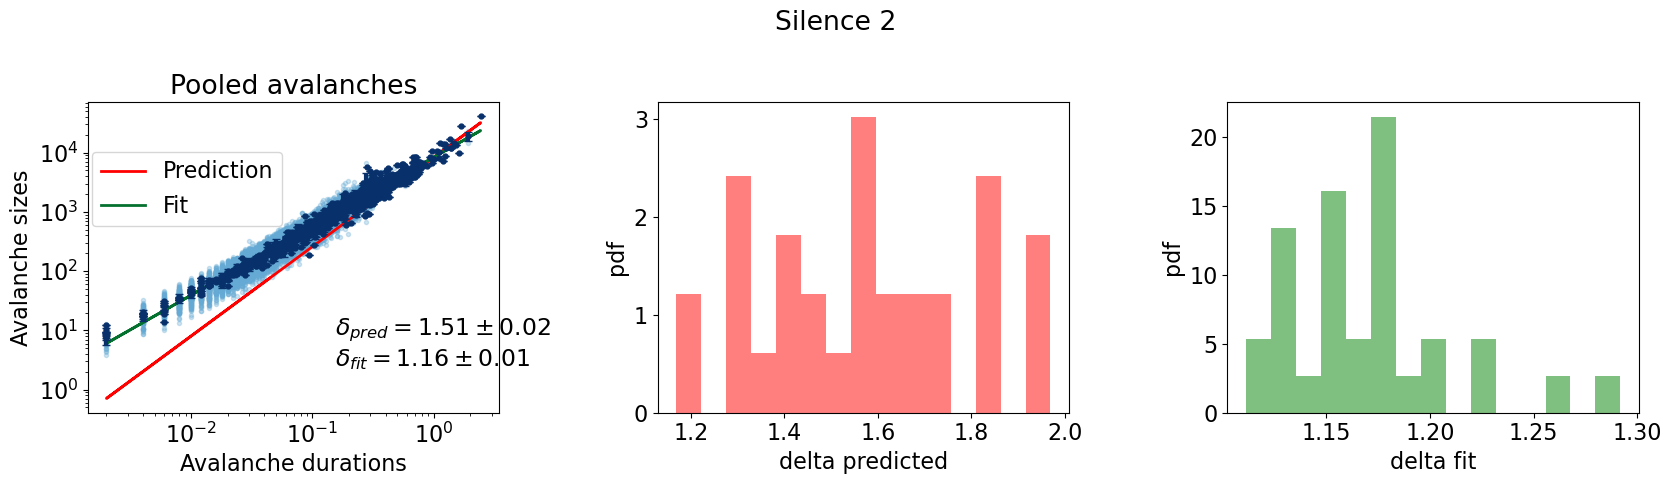

In [59]:


value = False

plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (17,5))
fig.suptitle('Silence 2')

axsd = fig.add_subplot(1,3,1)
axh1 = fig.add_subplot(1,3,2)
axh2 = fig.add_subplot(1,3,3)
#axdh = fig.add_subplot(2,2,4)
alphas = []

pred = []
fit =[]
totals = []
totald  =[]

#os.chdir('../../../Downloads/avalanches_in_silences/avalanches_silence1/')
for i in range(len(ss)):

    s = ss[i]
    d = dd[i]*0.002
    
    v = scaling(s,d, ax = axsd)
    #axd.annotate("alpha= {}".format(round(exp,2)),[0.8,0.5])
    pred.append(v[0])
    fit.append(v[2])
    #if i == 1: break
    


    totals += ss[i].tolist()
    totald += d.tolist()
    #i+=1



totals = np.asarray(totals)
totald = np.asarray(totald)
v = scaling(totals,totald, ax = axsd, plotto = True)
#axsd.set_ylim(10**2.5, 10**5)
axsd.set_title('Pooled avalanches')


    
axh1.hist(pred, bins = 15, color = 'red', alpha = .5, density = True)
axh1.set_xlabel('delta predicted')
axh1.set_ylabel('pdf')

axh2.hist(fit, bins = 15, color = 'green', alpha = .5, density = True)
axh2.set_xlabel('delta fit')
axh2.set_ylabel('pdf')

plt.tight_layout()

In [ ]:
g = np.array([v[4:][0],v[4:][1],v[4:][2]])
g.shape

In [ ]:
import pandas as pd
gg = pd.DataFrame(g.T, columns = ['Durations [s]', 'Average sizes', 'Std sizes'], index = None)
gg.to_csv('C:/Users/Benedetta/Desktop/Criticality in barrel cortex/numpy files/Sizes vs Durations silence 2.csv')

In [ ]:
ex = pd.read_csv('C:/Users/Benedetta/Desktop/Criticality in barrel cortex/numpy files/Sizes vs Durations silence 2.csv', index_col = 0)

In [ ]:
ex

In [ ]:
plt.loglog(ex["Durations [s]"],ex["Average sizes"], 'ro', markersize = 3);

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.508474883610495 +- 0.020432911252204287
Fit from of average size given duration points: delta =  1.1954546641392656 +- 0.008994729445564162


C:\Users\Benedetta\AppData\Local\Temp\ipykernel_7012\521089483.py:147: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray([pred, errpred,fit,errfit,a,b,c])


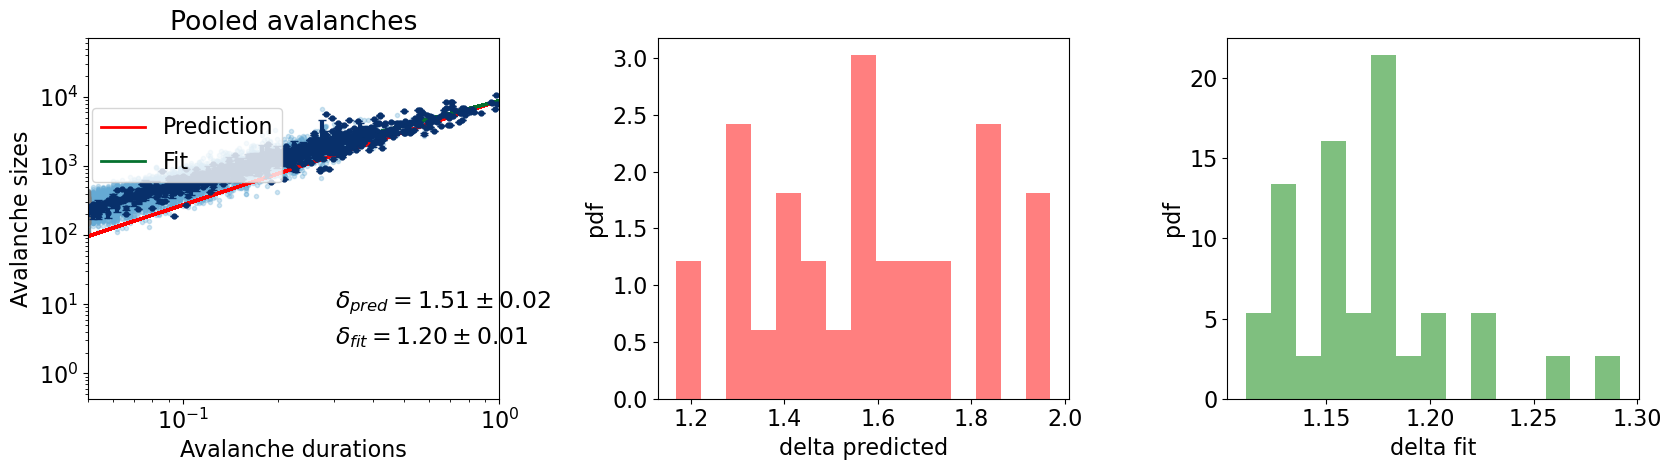

In [60]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (17,5))
axsd = fig.add_subplot(1,3,1)
axh1 = fig.add_subplot(1,3,2)
axh2 = fig.add_subplot(1,3,3)
#axdh = fig.add_subplot(2,2,4)
alphas = []

totals = np.asarray(totals)
totald = np.asarray(totald)
v = scaling(totals,totald, ax = axsd, plotto = True, xminfit = 0.05)
axsd.set_title('Pooled avalanches')

axsd.set_xlim(0.05,1)


    
axh1.hist(pred, bins = 15, color = 'red', alpha = .5, density = True)
axh1.set_xlabel('delta predicted')
axh1.set_ylabel('pdf')

axh2.hist(fit, bins = 15, color = 'green', alpha = .5, density = True)
axh2.set_xlabel('delta fit')
axh2.set_ylabel('pdf')



        
plt.tight_layout()

In [ ]:
## devo binnare le avalanches durations

In [ ]:
##devo togliere tutta la parte iniziale dal fit che non considero in valanghe


In [ ]:
# S vs T, crackling noise, meeting with Jesus and Samir

In [ ]:


## autocorrelazione time series valanghe

In [61]:
12

12

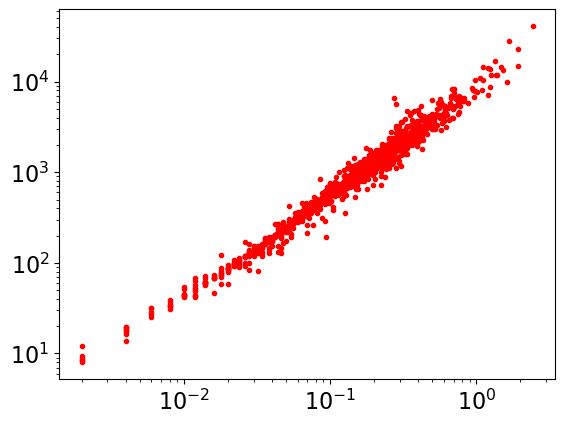

In [69]:
ex = pd.read_csv('C:/Users/Benedetta/Desktop/Criticality in barrel cortex/numpy files/Sizes vs Durations silence 2.csv', index_col = 0)


plt.loglog(ex["Durations [s]"],ex["Average sizes"], 'ro', markersize = 3);

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.6932123769364549 +- 0.0781232066446299
Fit from of average size given duration points: delta =  1.1884721030618328 +- 0.015208991959492282


C:\Users\Benedetta\AppData\Local\Temp\ipykernel_7012\3259361468.py:147: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray([pred, errpred,fit,errfit,a,b,c])


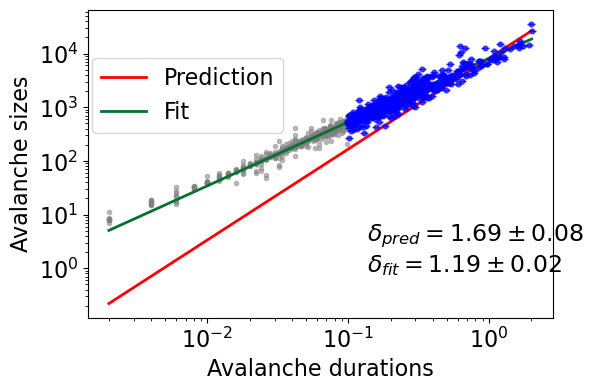

In [83]:
ex = pd.read_csv('C:/Users/Benedetta/Desktop/Criticality in barrel cortex/numpy files/Sizes vs Durations silence 1.csv', index_col = 0)

v = scaling(ex["Average sizes"],ex["Durations [s]"],plotto = True, xminfit = 0.1)


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.6932123769364549 +- 0.0781232066446299
Fit from of average size given duration points: delta =  1.1884721030618328 +- 0.015208991959492282
Calculating best minimal value for power law fit


C:\Users\Benedetta\AppData\Local\Temp\ipykernel_7012\3259361468.py:147: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray([pred, errpred,fit,errfit,a,b,c])


Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.7136658101087867 +- 0.07644698266099496
Fit from of average size given duration points: delta =  1.178402266004332 +- 0.012352059070215103


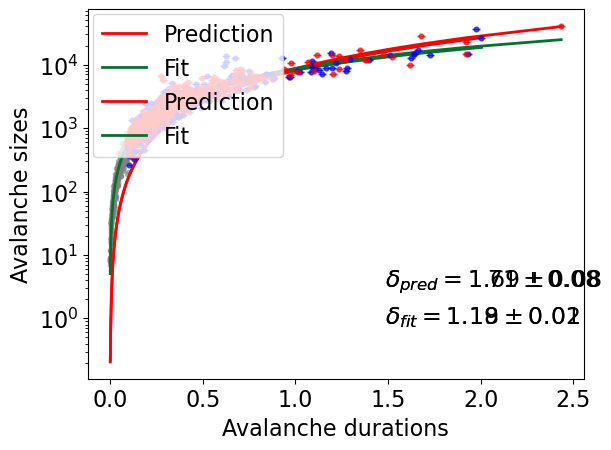

In [90]:
ex2 = pd.read_csv('C:/Users/Benedetta/Desktop/Criticality in barrel cortex/numpy files/Sizes vs Durations silence 2.csv', index_col = 0)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
v = scaling(ex["Average sizes"],ex["Durations [s]"],plotto = True, xminfit = 0.1, ax = ax)
v = scaling(ex2["Average sizes"],ex2["Durations [s]"],plotto = True, xminfit = 0.1,ax = ax,color = 'red')
#plt.ylim(10**3,10**4.5)
plt.xscale('linear')